In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch
print(torch.__version__)

2.0.0+cu117


In [4]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib as mpl
import torch
import numpy as np
import imageio
import matplotlib.image as mpimg
import matplotlib.animation as animation
import os
import cv2
import sys
sys.path.append('../')
from check_log import *
from tqdm import tqdm
from IPython.display import Image

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

mpl.rc('font', **font)

In [11]:
def get_log_probs(event_path):
    event_acc = EventAccumulator(str(event_path))
    event_acc.Reload()
    # print(event_acc.Tags()) # Show all tags in the log file

    _, step_nums, training_log_probs = zip(*event_acc.Scalars('training_log_probs'))
    _, _, validation_log_probs = zip(*event_acc.Scalars('validation_log_probs'))
    _, _, best_validation_log_prob = zip(*event_acc.Scalars('best_validation_log_prob'))
    return step_nums, training_log_probs, validation_log_probs, best_validation_log_prob

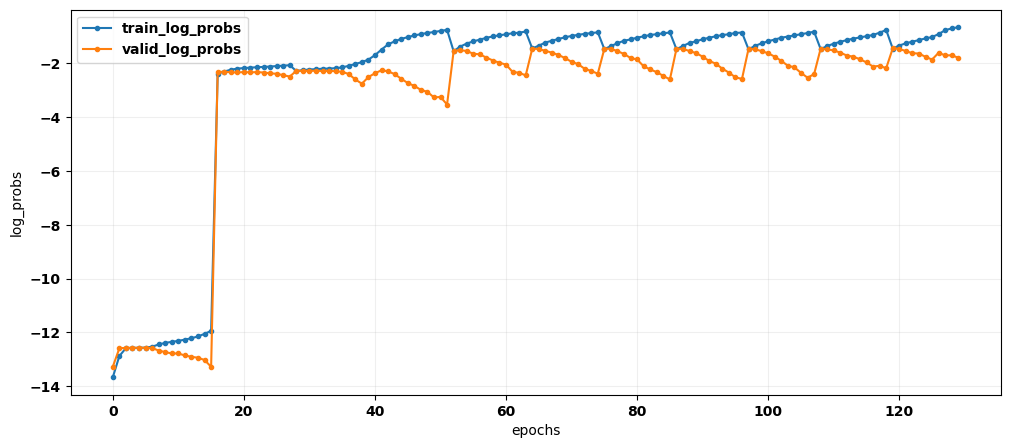

In [21]:
# the log path
log_dir = Path('../src/train/logs/train_L0_rnn/a0')

event_path = log_dir / 'events.out.tfevents.1681764802.snnmonster.198415.0'
step_nums, training_log_probs, validation_log_probs, best_validation_log_prob = get_log_probs(event_path)
best_validation_log_prob = max(training_log_probs)

fig, ax = plt.subplots(figsize=(12,5))
plt.plot(step_nums, training_log_probs, '.-', label='train_log_probs')
plt.plot(step_nums, validation_log_probs, '.-', label='valid_log_probs')
# plt.plot(best_epochs, best_valid_log_prob, 'v', label='with best valid_log_prob', markersize=10)
# plt.plot(best_epochs, best_train_log_prob, 'v', markersize=10)
plt.legend()
plt.xlabel('epochs')
plt.ylabel('log_probs')
plt.grid(alpha=0.2)
# plt.ylim([-1, 0.3])
# plt.title(title)

## check the posterior after each run training 

results shown in the presentation

In [34]:
def check_post_results(x_figures, x_figures_run_idx, x_valid_id):
    images = []
    print('animating posterior results')
    for idx, (filename, run_idx) in enumerate(zip(*(x_figures, x_figures_run_idx))):
    
        fig, axes = plt.subplots(1, 1, figsize=(6, 5))
        ax = axes#[0]
        img = mpimg.imread(log_dir/'posterior'/filename)
        print(filename)
        ax.imshow(img)
        ax.axis('off')
        
        ax.set_title(f'validate x_{x_valid_id} round {run_idx}')
        
        fig.canvas.draw()       # draw the canvas, cache the renderer
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        images.append(image)
        plt.close(fig)
    
    return images

x_figures_all = os.listdir(log_dir/'posterior')

x_figures = [figure for figure in x_figures_all if figure.startswith(f'x_o')]
x_figures.sort(key=lambda x: int(x.split('_run')[-1].split('.')[0]))
x_figures_run_idx = [int(figure.split('_run')[-1].split('.')[0]) for figure in x_figures]

images = check_post_results(x_figures, x_figures_run_idx, x_valid_id='o')

imageio.mimsave(log_dir/'posterior'/'ani'/f'posterior_x_o.gif', images, fps=1)

print('saved animation x_o')

x_figures = [figure for figure in x_figures_all if figure.startswith(f'x_seen')]
x_figures.sort(key=lambda x: int(x.split('_run')[-1].split('.')[0]))
x_figures_run_idx = [int(figure.split('_run')[-1].split('.')[0]) for figure in x_figures]

images = check_post_results(x_figures, x_figures_run_idx, x_valid_id='0')

imageio.mimsave(log_dir/'posterior'/'ani'/f'posterior_x_seen.gif', images, fps=1)

print('saved animation x_0')


animating posterior results
x_o_posterior_run0.png
x_o_posterior_run1.png
x_o_posterior_run2.png
x_o_posterior_run3.png
x_o_posterior_run4.png
x_o_posterior_run5.png
x_o_posterior_run6.png
x_o_posterior_run7.png
x_o_posterior_run8.png
x_o_posterior_run9.png
saved animation x_o
animating posterior results
x_seen_posterior_run0.png
x_seen_posterior_run1.png
x_seen_posterior_run2.png
x_seen_posterior_run3.png
x_seen_posterior_run4.png
x_seen_posterior_run5.png
x_seen_posterior_run6.png
x_seen_posterior_run7.png
x_seen_posterior_run8.png
x_seen_posterior_run9.png
saved animation x_0


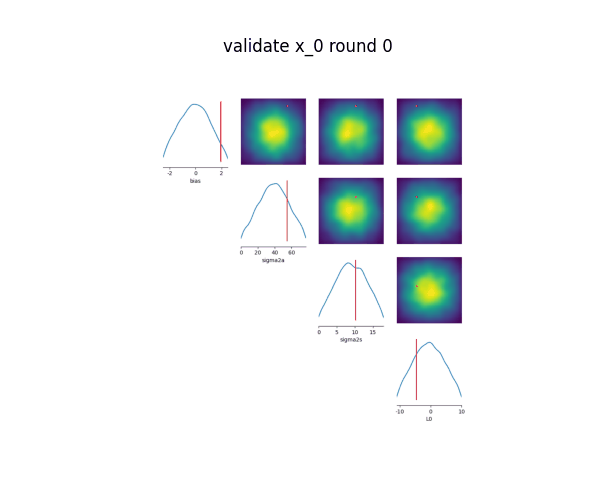

In [36]:
from IPython.display import Image
Image(log_dir/'posterior'/'ani'/f'posterior_x_seen.gif')

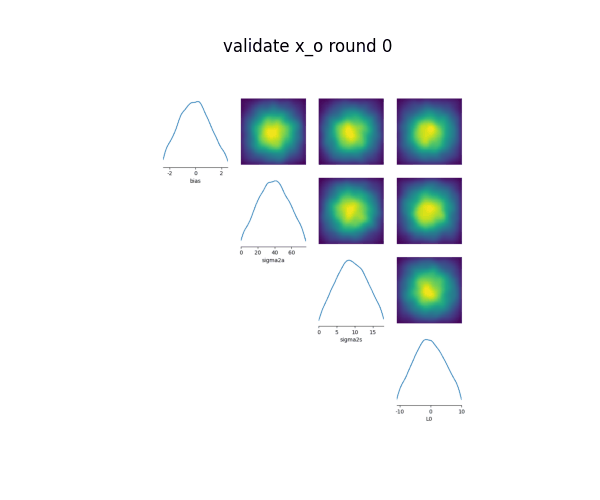

In [37]:
from IPython.display import Image
Image(log_dir/'posterior'/'ani'/f'posterior_x_o.gif')

## exp-3dur-a1-1

In [3]:
log_dir = Path('/home/wehe/tmp/NSC/codes/src/train/logs/train_L0/exp-3dur-a1')
log_dir = Path('/home/wehe/tmp/NSC/codes/src/train/logs/train_L0/exp-3dur-a2')
best_model_path = log_dir /'model/best_model_state_dict_run0.pt'
ea_post,ea_val,ea_train = get_events(log_dir)

loading events from /home/wehe/tmp/NSC/codes/src/train/logs/train_L0/exp-3dur-a2... validation training posteriors done


In [4]:
val_ = np.array([[e.wall_time, e.step, e.value] for e in ea_val.Scalars('log_probs')])
val_time, val_step, val_log_probs = val_[:,0], val_[:,1], val_[:,2]

train_ = np.array([[e.wall_time, e.step, e.value] for e in ea_train.Scalars('log_probs')])
train_time, train_step, train_log_probs = train_[:,0], train_[:,1], train_[:,2]

lr_ = np.array([[e.wall_time, e.step, e.value] for e in ea_post.Scalars('learning_rates')])
lr_time, lr_step, lr_lr = lr_[:,0], lr_[:,1], lr_[:,2]

Text(0.5, 0, 'training time (hours)')

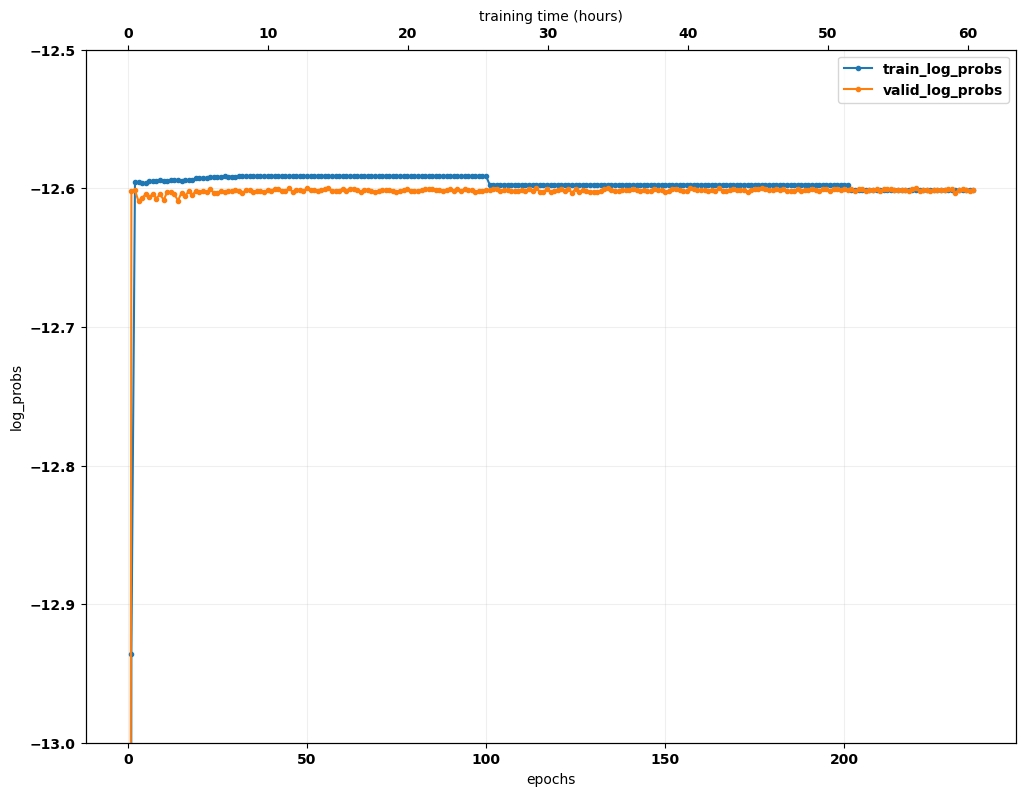

In [5]:
fig, ax = plt.subplots(1, figsize=(12,9))
ax.plot(train_step, train_log_probs, '.-', label='train_log_probs')
ax.plot(val_step, val_log_probs, '.-', label='valid_log_probs')
# plt.plot(lr_step, lr_lr, '.-', label='lr')
ax.set_ylim([-13, -12.5])
ax.set_xlabel('epochs')
ax.set_ylabel('log_probs')
ax.grid(alpha=0.2)
ax.legend()
ax0 = ax.twiny()
ax0.plot((val_time-val_time[0])/60/60, val_log_probs, alpha=0)
ax0.set_xlabel('training time (hours)')

## exp-p2-3dur-test-0~3

In [7]:
log_dir = Path('/home/wehe/tmp/NSC/codes/src/train/logs/train_L0/exp-p2-3dur-test-1')
best_model_path = log_dir /'model/best_model_state_dict_run0.pt'
ea_post, ea_val, ea_train = get_events(log_dir)

loading events from /home/wehe/tmp/NSC/codes/src/train/logs/train_L0/exp-p2-3dur-test-1... validation training posteriors done


plotting learning rate and log_probs... 

/home/wehe/tmp/NSC/codes/src/train/check_log/check_log.py:155: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f'{log_dir}/training_curve_.png')


saved training curve to /home/wehe/tmp/NSC/codes/src/train/logs/train_L0/exp-p2-3dur-test-1/training_curve.png


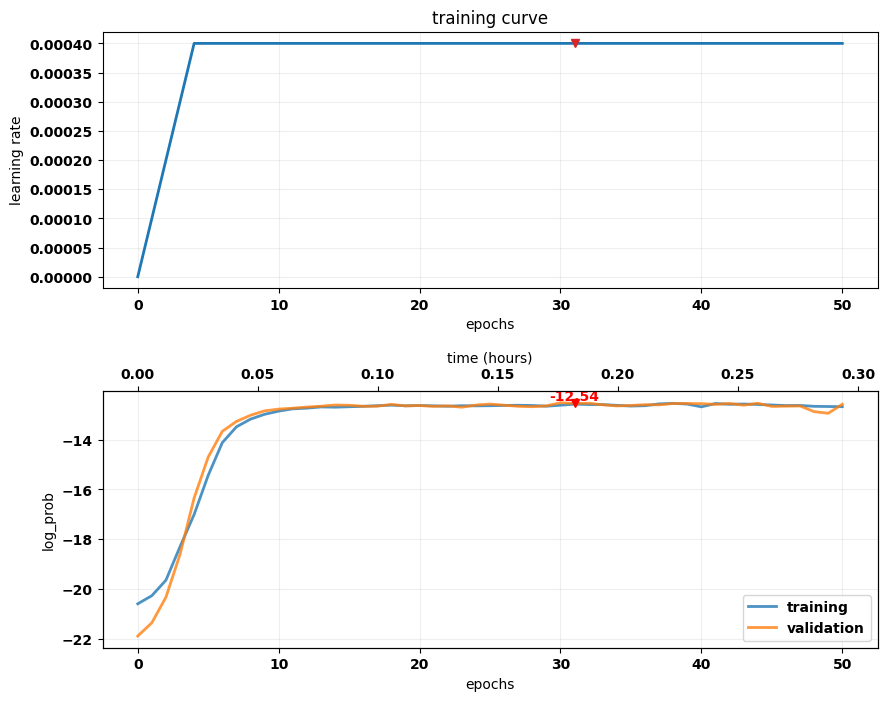

In [10]:
# extract data from event files
val_perf, train_perf, lr, best = get_event_data(ea_post, ea_val, ea_train)
# plot training curves
plot_lr_log_probs(val_perf, train_perf, lr, best, log_dir)

# validation posterior tests: 2
# training posterior tests: 2
best epoch: 31
get 18 figures: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 19 26 31]
chosen 5 plots to animate, idx: [ 1  5  9 13 31]


100%|██████████| 5/5 [00:02<00:00,  2.47it/s]


saved animation to  /home/wehe/tmp/NSC/codes/src/train/logs/train_L0/exp-p2-3dur-test-1/posterior_shuffled.gif

# validation posterior tests: 2
# training posterior tests: 2
best epoch: 31
get 18 figures: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 19 26 31]
chosen 5 plots to animate, idx: [ 1  5  9 13 31]


100%|██████████| 5/5 [00:01<00:00,  2.69it/s]


saved animation to  /home/wehe/tmp/NSC/codes/src/train/logs/train_L0/exp-p2-3dur-test-1/posterior.gif



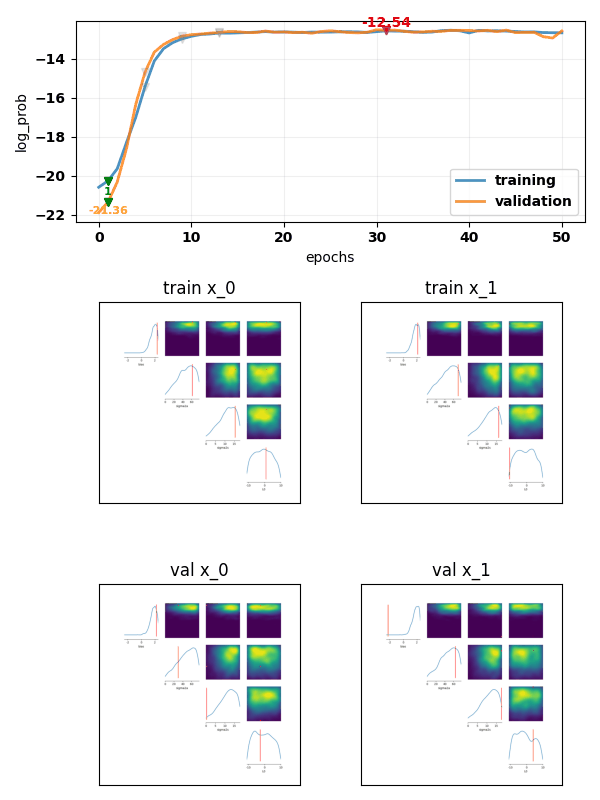

In [11]:
num_frames = 5

# animate posterior plots
plot_shuffled = True
animate_posterior(log_dir, num_frames, plot_shuffled, 
                  val_perf, train_perf, lr, best)

# animate posterior plots
plot_shuffled = False
animate_posterior(log_dir, num_frames, plot_shuffled, 
                  val_perf, train_perf, lr, best)

Image(log_dir/'posterior_shuffled.gif') if plot_shuffled else Image(log_dir/'posterior.gif')